## Alunos

- Andreus Jartã Timm
- Kesley Jorge dos Santos
- Priscila Alvez Costa

# Lista 1
-------------


**Objetivo**: Treinar modelos de classificação utilizando Regressão Logística e Árvore de Decisão.


**Banco de Dados**: Detecção de Doenças no Fígado


[Link para o banco](https://drive.google.com/file/d/1jnLwuv4e_ZeCqluMXs3Mar2TGetumtVv/view?usp=drive_link)


Descrição do banco:
> Este banco de dados contém registros de 416 pacientes diagnosticados com doença no fígado e 167 pacientes sem a doença. Esta informação está na coluna `Selector`.
>
> O banco de dados possui 10 variáveis:
>
> * `age`: idade
> * `Gender`: gênero do paciente
> * `TB`: Bilirrubina total
> * `DB`: Bilirrubina direta
> * `Alkphos`: fosfatase alcalina.
> * `Sgpt`: transaminase glutâmico-pirúvica sérica (TGP)
> * `Sgot`: transaminase glutâmico-oxalacética sérica (TGO)
> * `TP`: Proteína total
> * `ALB`: Albumina
> * `A/G Ratio`: Relação Albumina:Globulina


Exercício:


1. Carregue o banco de dados e analise suas features (calcule as descritivas).  
* Transforme a feature sexo em uma variavel dummy.
2. Separe o banco dados:
* Utilize 80% dos dados para treino e 20% para teste.
3. Treine um modelo de Regressão Logística.
* Interprete dois coeficientes.
4. Treine um modelo de árvore de decisão.
* Utilize max_depth de 4.
* Identifique as duas features mais importantes.
5. Construa um relatório comparativo dos dois modelos:
* Utilizando a **precisão da classe de pacientes doentes**, qual modelo tem melhor desempenho na detecção de doença no fígado?
* Utilizando o **f1-score da classe de pacientes doentes**, qual modelo tem melhor desempenho na detecção de doença no fígado?


Obs.: Utilize o **mesmo** conjunto de treino e teste para construir e avaliar ambos os modelos.

## 1. Carga do banco
--------------------

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz

df = pd.read_csv('../dataset/IndianLiverPatientDataset(ILPD).csv')


### 1.1 - Exibir as primeiras linhas do DataFrame

In [ ]:
print(df.head())

   Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  Selector
0   65  Female   0.7  0.1      187    16    18  6.8  3.3       0.90         1
1   62    Male  10.9  5.5      699    64   100  7.5  3.2       0.74         1
2   62    Male   7.3  4.1      490    60    68  7.0  3.3       0.89         1
3   58    Male   1.0  0.4      182    14    20  6.8  3.4       1.00         1
4   72    Male   3.9  2.0      195    27    59  7.3  2.4       0.40         1


### 1.2 - Analisar as features descritivas

In [3]:
print(df.describe())

              Age          TB          DB      Alkphos         Sgpt  \
count  583.000000  583.000000  583.000000   583.000000   583.000000   
mean    44.746141    3.298799    1.486106   290.576329    80.713551   
std     16.189833    6.209522    2.808498   242.937989   182.620356   
min      4.000000    0.400000    0.100000    63.000000    10.000000   
25%     33.000000    0.800000    0.200000   175.500000    23.000000   
50%     45.000000    1.000000    0.300000   208.000000    35.000000   
75%     58.000000    2.600000    1.300000   298.000000    60.500000   
max     90.000000   75.000000   19.700000  2110.000000  2000.000000   

              Sgot          TP         ALB   A/G Ratio    Selector  
count   583.000000  583.000000  583.000000  579.000000  583.000000  
mean    109.910806    6.483190    3.141852    0.947064    1.286449  
std     288.918529    1.085451    0.795519    0.319592    0.452490  
min      10.000000    2.700000    0.900000    0.300000    1.000000  
25%      25.000

### 1.3 - Transformar a coluna Gender em dummy

In [4]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)  # Female=1, Male=0

In [5]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,False,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,True,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,True,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,True,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,True,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### 1.4 - Exibir as mudanças no DataFrame

In [ ]:
print(df.head())

   Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  Selector
0   65   False   0.7  0.1      187    16    18  6.8  3.3       0.90         1
1   62    True  10.9  5.5      699    64   100  7.5  3.2       0.74         1
2   62    True   7.3  4.1      490    60    68  7.0  3.3       0.89         1
3   58    True   1.0  0.4      182    14    20  6.8  3.4       1.00         1
4   72    True   3.9  2.0      195    27    59  7.3  2.4       0.40         1


### 1.5 - Verificando dados faltantes

In [ ]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

### 1.6 - Preenchendo os valores faltantes com a média dos valores

In [6]:
media = df['A/G Ratio'].mean()
df['A/G Ratio'] = df['A/G Ratio'].fillna(media)

### 1.7 - Analisando dados

In [7]:
df[['Age','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G Ratio']].describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


## 2. Quebra do banco
--------------------

### 2.1 - Separando os dados entre features (X) e target (y)

In [8]:
X = df.drop(columns=['Selector'])
y = df['Selector']

### 2.2 - Separar o conjunto de dados em treino (80%) e teste (20%)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df['Selector'] = df['Selector'].replace({1: 1, 2: 0})

## 3. Primeiro modelo
--------------------

In [ ]:
# Treinar o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Coeficientes do modelo
coef = log_reg.coef_[0]
print("Coeficientes do modelo de Regressão Logística:", coef)

# Prever no conjunto de teste
y_pred_log = log_reg.predict(X_test)

# Avaliação do modelo de Regressão Logística
print(classification_report(y_test, y_pred_log))

Coeficientes do modelo de Regressão Logística: [-0.01489148 -0.16864709 -0.01165153 -0.40869514 -0.00139515 -0.00784904
 -0.00280985 -0.52848682  0.84767443 -0.58622101]
              precision    recall  f1-score   support

           1       0.78      0.92      0.85        87
           2       0.53      0.27      0.36        30

    accuracy                           0.75       117
   macro avg       0.66      0.59      0.60       117
weighted avg       0.72      0.75      0.72       117



### 3.2 - Interpretação de dois coeficientes

In [ ]:
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coef})
print(coef_df)

# Exemplo de interpretação
print(f"Coeficiente de TB (Bilirrubina Total): {coef_df[coef_df['Feature'] == 'TB']['Coefficient'].values[0]}")
print(f"Coeficiente de Age (Idade): {coef_df[coef_df['Feature'] == 'Age']['Coefficient'].values[0]}")


     Feature  Coefficient
0        Age    -0.014891
1     Gender    -0.168647
2         TB    -0.011652
3         DB    -0.408695
4    Alkphos    -0.001395
5       Sgpt    -0.007849
6       Sgot    -0.002810
7         TP    -0.528487
8        ALB     0.847674
9  A/G Ratio    -0.586221
Coeficiente de TB (Bilirrubina Total): -0.011651528659262412
Coeficiente de Age (Idade): -0.014891479368337504


In [ ]:
#Criando um df para obtenção do log_reg
pd.DataFrame(log_reg.coef_.T, index=X_train.columns)

,0
Age,-0.014891
Gender,-0.168647
TB,-0.011652
DB,-0.408695
Alkphos,-0.001395
Sgpt,-0.007849
Sgot,-0.002810
TP,-0.528487
ALB,0.847674
A/G Ratio,-0.586221


In [ ]:
log_reg.coef_
log_reg.intercept_

array([2.43214327])

In [ ]:
pred_class = log_reg.predict(X_test)

In [ ]:
confusion_matrix(y_test, pred_class)

array([[80,  7],
       [22,  8]])

In [ ]:
# cálculo do probabilidade do predito
pred_prob = log_reg.predict_proba(X_test)

#Cálculo do AUC

roc_auc = roc_auc_score(y_test, pred_prob[:, 1])
roc_auc

np.float64(0.8195402298850576)

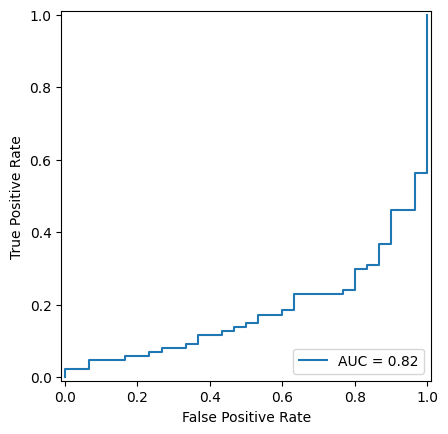

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

## 4. Segundo modelo
--------------------

In [10]:
# Treinar o modelo de Árvore de Decisão com max_depth=4
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_tree = tree.predict(X_test)

# Avaliação do modelo de Árvore de Decisão
print(classification_report(y_test, y_pred_tree))

# Importância das features
importances = tree.feature_importances_
features_importantes = sorted(zip(importances, X.columns), reverse=True)
print("Duas features mais importantes:", features_importantes[:2])


              precision    recall  f1-score   support

           1       0.82      0.82      0.82        87
           2       0.47      0.47      0.47        30

    accuracy                           0.73       117
   macro avg       0.64      0.64      0.64       117
weighted avg       0.73      0.73      0.73       117

Duas features mais importantes: [(0.43597288475860335, 'DB'), (0.25079033519879484, 'Alkphos')]


## 4.1 Duas features mais importantes
--------------------

In [11]:
print("Duas features mais importantes:", features_importantes[:2])


Duas features mais importantes: [(0.43597288475860335, 'DB'), (0.25079033519879484, 'Alkphos')]


In [15]:
# Treinar o modelo de Árvore de Decisão com max_depth=4
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_tree = tree.predict(X_test)

# Avaliação do modelo de Árvore de Decisão
print(classification_report(y_test, y_pred_tree))

# Importância das features
importances = tree.feature_importances_
features_importantes = sorted(zip(importances, X.columns), reverse=True)
print("Duas features mais importantes:", features_importantes[:2])


              precision    recall  f1-score   support

           1       0.82      0.82      0.82        87
           2       0.47      0.47      0.47        30

    accuracy                           0.73       117
   macro avg       0.64      0.64      0.64       117
weighted avg       0.73      0.73      0.73       117

Duas features mais importantes: [(0.43597288475860335, 'DB'), (0.25079033519879484, 'Alkphos')]


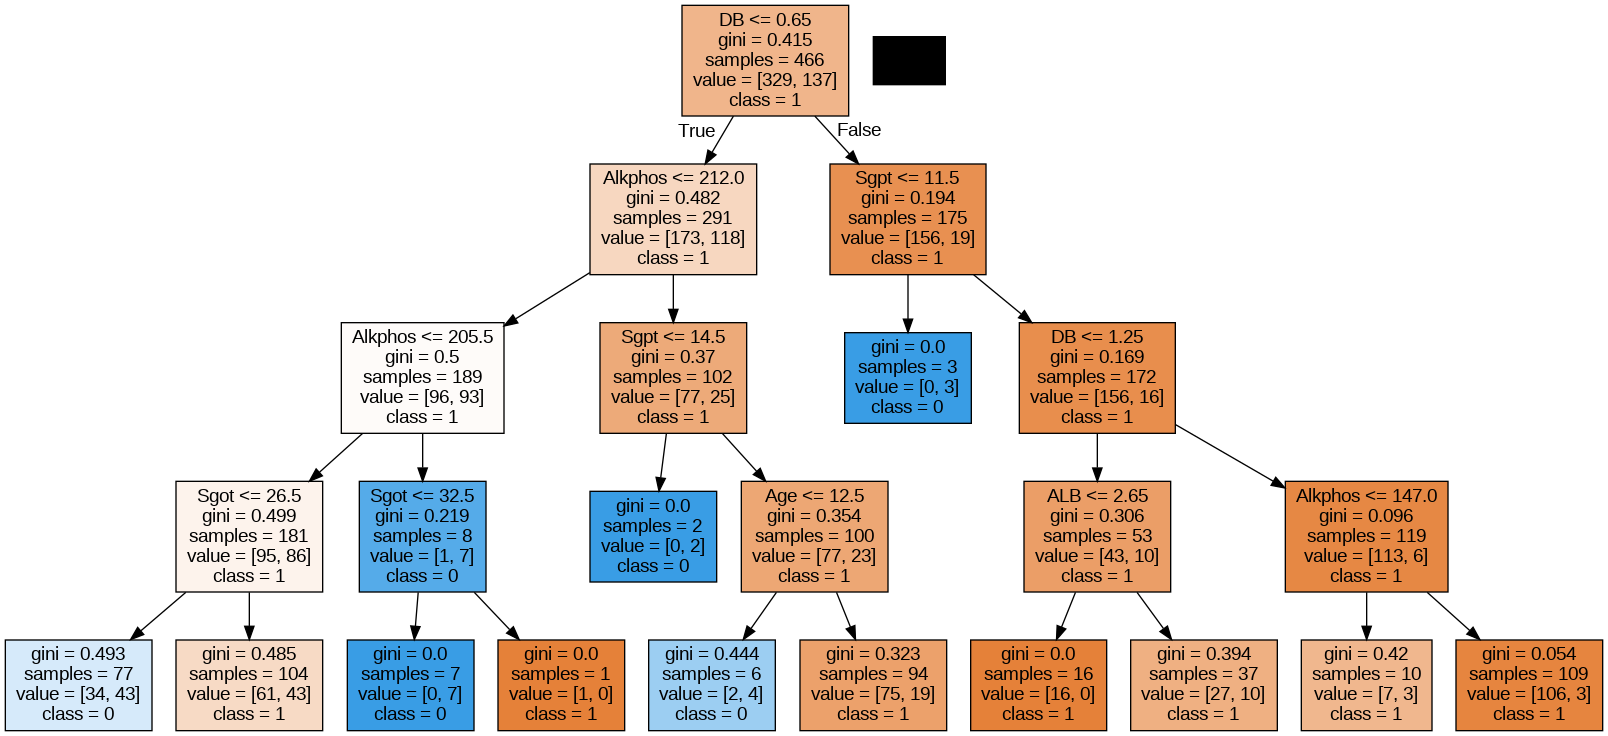

In [16]:
dot_data = StringIO()
export_graphviz(
tree,
out_file=dot_data,
feature_names=X.columns,
class_names=["1", "0"],
filled=True,
)
g = pydotplus.graph_from_dot_data(
dot_data.getvalue()
)

from IPython.display import Image
Image(g.create_png())

## 5. Avaliação do modelo
--------------------

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Precisão da classe de pacientes doentes
precision_log = precision_score(y_test, y_pred_log, pos_label=2)
precision_tree = precision_score(y_test, y_pred_tree, pos_label=2)

# f1-score da classe de pacientes doentes
f1_log = f1_score(y_test, y_pred_log, pos_label=2)
f1_tree = f1_score(y_test, y_pred_tree, pos_label=2)

print(f"Precisão Regressão Logística: {precision_log}")
print(f"Precisão Árvore de Decisão: {precision_tree}")

print(f"F1-score Regressão Logística: {f1_log}")
print(f"F1-score Árvore de Decisão: {f1_tree}")


Precisão Regressão Logística: 0.5333333333333333
Precisão Árvore de Decisão: 0.4666666666666667
F1-score Regressão Logística: 0.35555555555555557
F1-score Árvore de Decisão: 0.4666666666666667


## 5.1 Qual modelo escolhido olhando para a precisão de detecção de doença no fígado?
--------------------

In [ ]:
print(f"Precisão Regressão Logística: {precision_log}")
print(f"Precisão Árvore de Decisão: {precision_tree}")

# Escolha do modelo com base na precisão
if precision_log > precision_tree:
    print("A Regressão Logística tem melhor desempenho na precisão de detecção de doença no fígado.")
else:
    print("A Árvore de Decisão tem melhor desempenho na precisão de detecção de doença no fígado.")


Precisão Regressão Logística: 0.5333333333333333
Precisão Árvore de Decisão: 0.4666666666666667
A Regressão Logística tem melhor desempenho na precisão de detecção de doença no fígado.


## 5.2 Qual modelo escolhido olhando para o f1-score do rótulo de doença do fígado?
--------------------

In [ ]:
print(f"F1-score Regressão Logística: {f1_log}")
print(f"F1-score Árvore de Decisão: {f1_tree}")

# Escolha do modelo com base no f1-score
if f1_log > f1_tree:
    print("A Regressão Logística tem melhor desempenho no f1-score da detecção de doença no fígado.")
else:
    print("A Árvore de Decisão tem melhor desempenho no f1-score da detecção de doença no fígado.")


F1-score Regressão Logística: 0.35555555555555557
F1-score Árvore de Decisão: 0.4666666666666667
A Árvore de Decisão tem melhor desempenho no f1-score da detecção de doença no fígado.
